<a href="https://colab.research.google.com/github/ilitteri/7506-Datos/blob/main/tp1_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import matplotlib as mpl
from scipy import stats

sb.set_theme()

In [71]:
def path_for(dataset: str) -> str:
    return f'/content/drive/MyDrive/{dataset}.csv'

def fix_salaries(x):
    try:
        a = float(x.replace(',', '.'))
    except:
        a = np.nan
    finally:
        return a

def categorize_experience(experience):
    rounded_experience = round(experience)
    if 0 <= rounded_experience < 1:
        return '0-1'
    elif 1 <= rounded_experience < 5:
        return '1-5'
    elif 5 <= rounded_experience <= 10:
        return '5-10'
    elif rounded_experience > 10:
        return '>10'

In [72]:
disney_movies = pd.read_csv(path_for("disney_movies"))
sysarmy = pd.read_csv(path_for("sysarmy"), skiprows=10)
rains = pd.read_csv(path_for("rains"), parse_dates=['Date'])

# Heatmap - Rains

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 23.874999999999993, 'Ciudades de Australia')

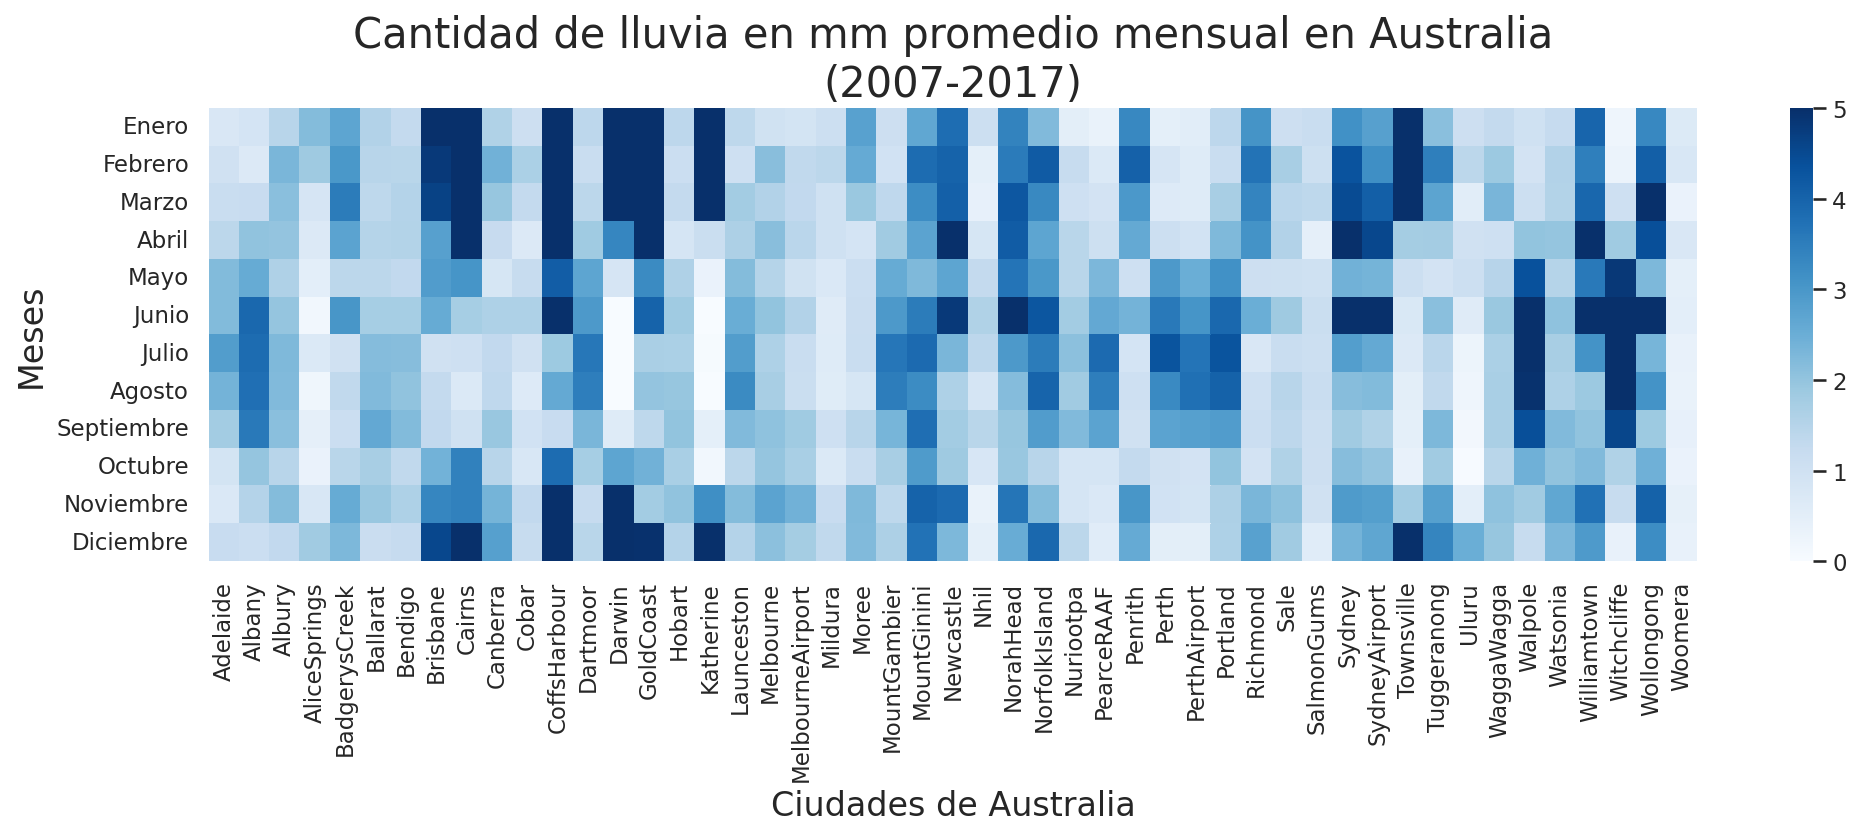

In [74]:
from math import pi
df_rains = rains[['Date', 'Location', 'Rainfall']]
df_rains['Date'] = df_rains['Date'].map(lambda d: d.month)
pv_rains = pd.pivot_table(data=df_rains, index=['Date'], columns=['Location'], values='Rainfall')

plt.figure(dpi=150, figsize=(16,4))
sb.heatmap(
    pv_rains, 
    cmap="Blues",
    vmin=0.,
    vmax=5.,
)
plt.yticks(
    np.arange(0.5, 12.5), 
    ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    rotation=0,
)
plt.title("Cantidad de lluvia en mm promedio mensual en Australia\n(2007-2017)", fontsize=20)
plt.ylabel("Meses", fontsize=16)
plt.xlabel("Ciudades de Australia", fontsize=16)

# Histograma - Rains

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

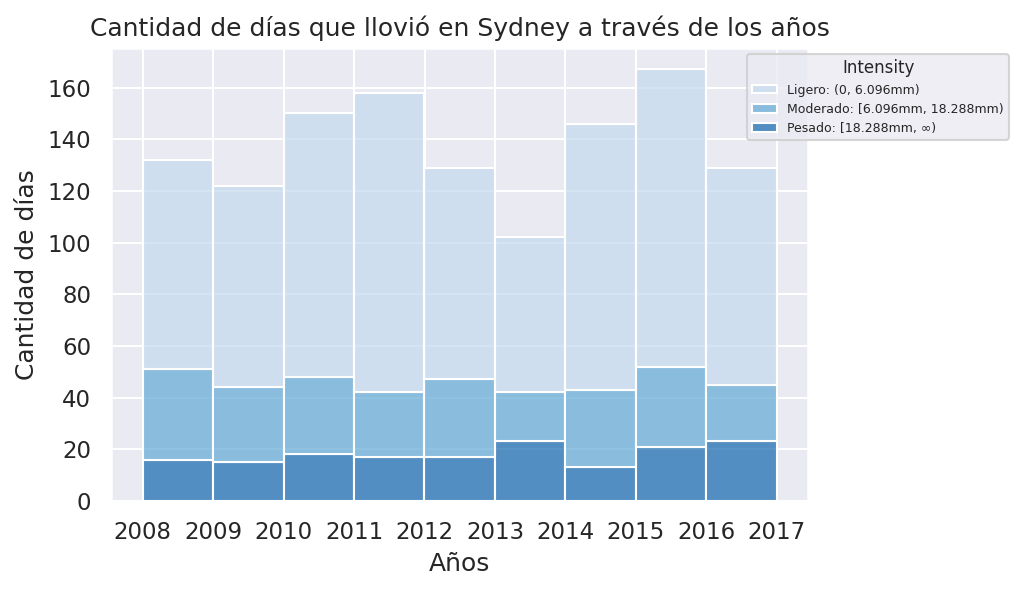

In [69]:
rains2 = rains.copy()
rains2.index = rains['Date']
rains2 = rains2[['Location', 'Rainfall']]

# http://www.bom.gov.au/climate/data-services/content/faqs-elements.html
#  "A rain day is recorded when there has been a daily rainfall total of at least 0.2 mm"

# https://www.weathershack.com/static/ed-rain-measurement.html
#  "Light rainfall is considered less than 0.10 inches (<2.54mm) of rain per hour. 
#   Moderate rainfall measures 0.10 to 0.30 inches (>2.54 and <0.762mm) of rain per hour. 
#   Heavy rainfall is more than 0.30 inches (>0.762mm) of rain per hour."
#   Converted to daily:
#       Light rainfall: (0, 6.096mm)
#       Moderate rainfall: [6.096mm, 18.288mm)
#       Heavy rainfall: [18.288mm, ∞)
moderate = 6.096
heavy = 18.288

light_raindays = rains2[(0.2 <= rains2['Rainfall']) & (rains2['Rainfall'] < moderate) & (rains2['Location'] == 'Sydney')]
moderate_raindays = rains2[(moderate <= rains2['Rainfall']) & (rains2['Rainfall'] < heavy) & (rains2['Location'] == 'Sydney')]
heavy_raindays = rains2[(heavy <= rains2['Rainfall']) & (rains2['Location'] == 'Sydney')]
# raindays = pd.DataFrame.merge(light_raindays, moderate_raindays)
bins = pd.date_range(start=rains2.index.min(), end=rains2.index.max(),freq='1Y')

light_raindays["Intensity"] = "Ligero: (0, 6.096mm)"
moderate_raindays["Intensity"] = "Moderado: [6.096mm, 18.288mm)"
heavy_raindays["Intensity"] = "Pesado: [18.288mm, ∞)"
raindays = pd.concat([light_raindays, moderate_raindays, heavy_raindays])

plt.figure(dpi=150)
plt.title('Cantidad de días que llovió en Sydney a través de los años')
plt.xlabel('Años')
plt.ylabel('Cantidad de días')
ax = sb.histplot(
    data=raindays, 
    x='Date',
    color="deepskyblue",
    bins=mpl.dates.date2num(bins),
    hue='Intensity',
    multiple="stack",
    palette="Blues"
)


sb.move_legend(ax, "upper center", bbox_to_anchor=(1.1, 1), ncol=1, fontsize=6, title_fontsize=8)

# Box Plot - Sysarmy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Text(0, 0.5, 'Salario mensual bruto en pesos')

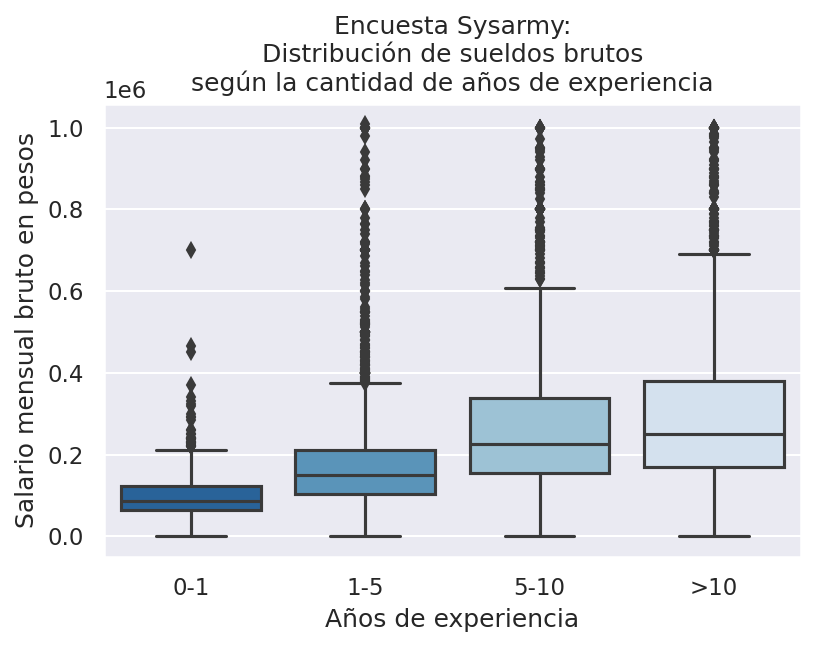

In [75]:
df_boxplot = sysarmy[['Años de experiencia', 'Salario mensual o retiro BRUTO (en tu moneda local)', 'Años en el puesto actual']]
df_boxplot['Salario mensual o retiro BRUTO (en tu moneda local)'] = df_boxplot['Salario mensual o retiro BRUTO (en tu moneda local)'].map(fix_salaries).dropna()
df_boxplot['Años en el puesto actual'] = df_boxplot['Años en el puesto actual'].map(categorize_experience)
df_boxplot['Años de experiencia'] = df_boxplot['Años de experiencia'].map(categorize_experience)
df_boxplot = df_boxplot[df_boxplot['Salario mensual o retiro BRUTO (en tu moneda local)'].notnull()]
df_boxplot = df_boxplot[np.abs(stats.zscore(df_boxplot['Salario mensual o retiro BRUTO (en tu moneda local)']) < 2.5)]

plt.figure(dpi=150)
plt.title('Encuesta Sysarmy:\nDistribución de sueldos brutos\nsegún la cantidad de años de experiencia')
sb.boxplot(
    data=df_boxplot, 
    x='Años de experiencia', 
    y='Salario mensual o retiro BRUTO (en tu moneda local)', 
    order=sorted(df_boxplot['Años de experiencia'].unique().tolist()),
    palette='Blues_r'
)
plt.ylabel("Salario mensual bruto en pesos")

# Violin Plot - Sysarmy

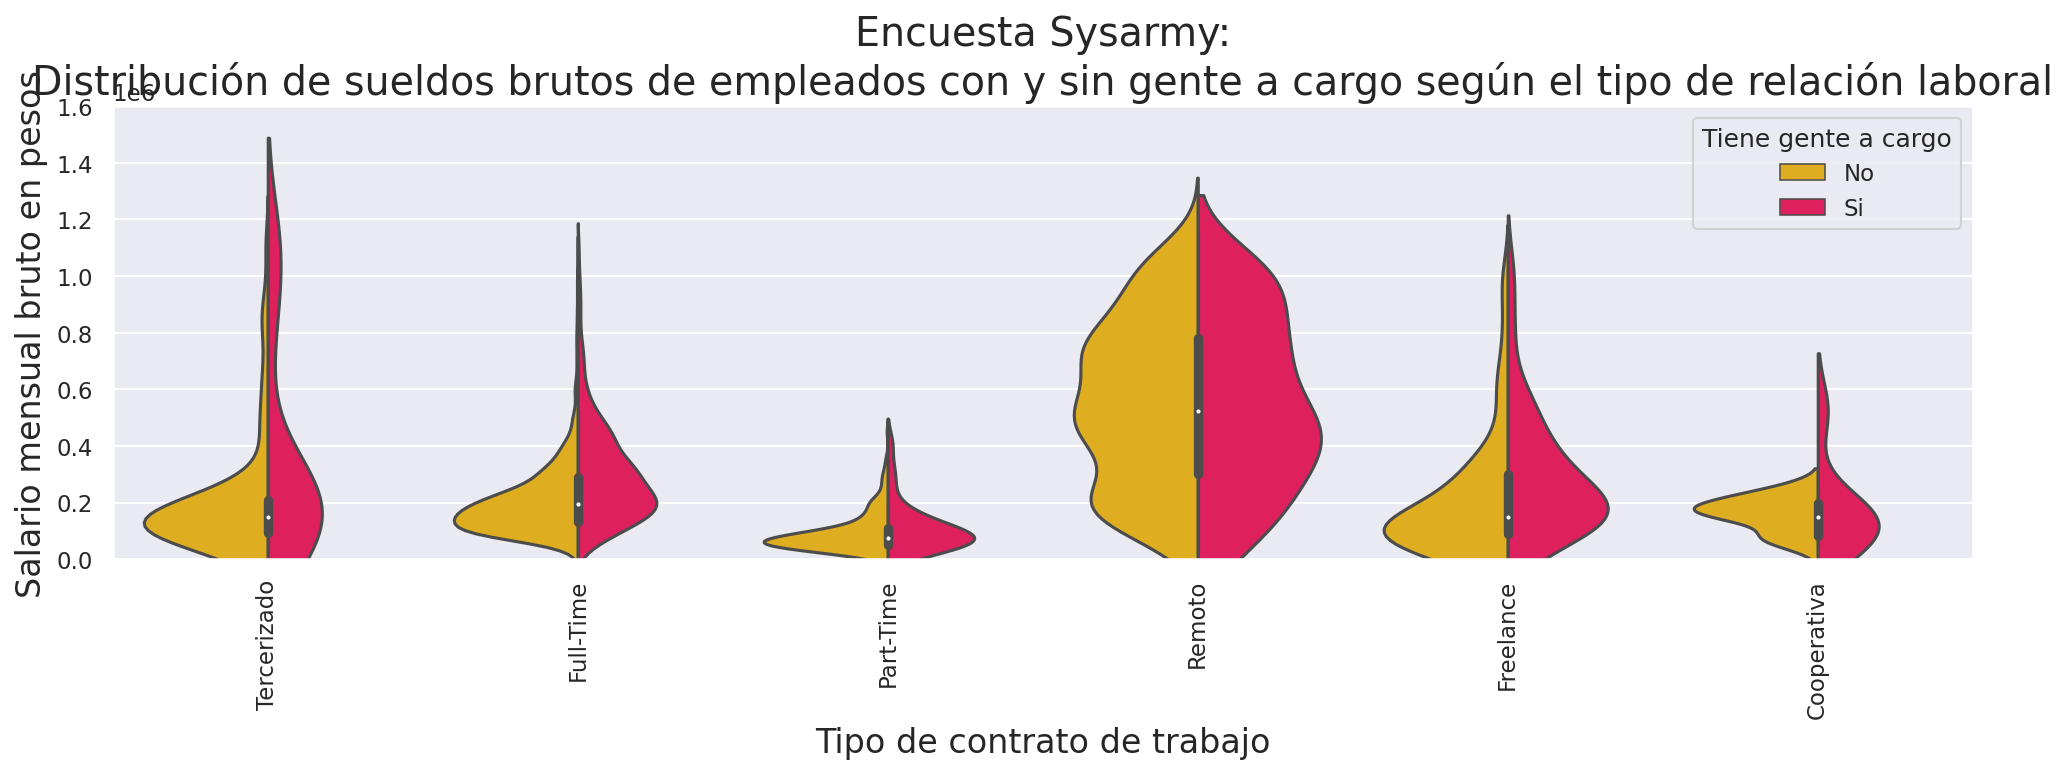

In [76]:
df = sysarmy[['Tipo de contrato', 'Salario mensual o retiro BRUTO (en tu moneda local)', '¿Gente a cargo?']].dropna()
df['Salario mensual o retiro BRUTO (en tu moneda local)'] = df['Salario mensual o retiro BRUTO (en tu moneda local)'].map(fix_salaries).dropna()
df['¿Gente a cargo?'] = df['¿Gente a cargo?'].map(lambda x: 'Si' if x else 'No')
df['Tipo de contrato'] = df['Tipo de contrato'].replace({'Tercerizado (trabajo a través de consultora o agencia)': 'Tercerizado', 'Remoto (empresa de otro país)': 'Remoto', 'Participación societaria en una cooperativa': 'Cooperativa'})
df = df[df['Salario mensual o retiro BRUTO (en tu moneda local)'].notnull()]
df = df[np.abs(stats.zscore(df['Salario mensual o retiro BRUTO (en tu moneda local)']) < 3)]

plt.figure(dpi=150, figsize=(16, 4))
plt.xticks(rotation=90)
plt.title("Encuesta Sysarmy:\nDistribución de sueldos brutos de empleados con y sin gente a cargo según el tipo de relación laboral", fontsize=19)
plt.ylim(bottom=.0, top=1.6e6)
sb.violinplot(
    data=df[df['Salario mensual o retiro BRUTO (en tu moneda local)'] > 10_000], 
    x='Tipo de contrato', 
    y='Salario mensual o retiro BRUTO (en tu moneda local)', 
    hue='¿Gente a cargo?', 
    split=True,
    #palette=['#ffba08', '#d00000']
    palette=['#ffbd00', '#ff0054']
)
plt.ylabel("Salario mensual bruto en pesos", fontsize=16)
plt.xlabel("Tipo de contrato de trabajo", fontsize=16)
plt.legend(title="Tiene gente a cargo")

# Heatmap - Disney Movies

Text(61.37499999999998, 0.5, 'Genre')

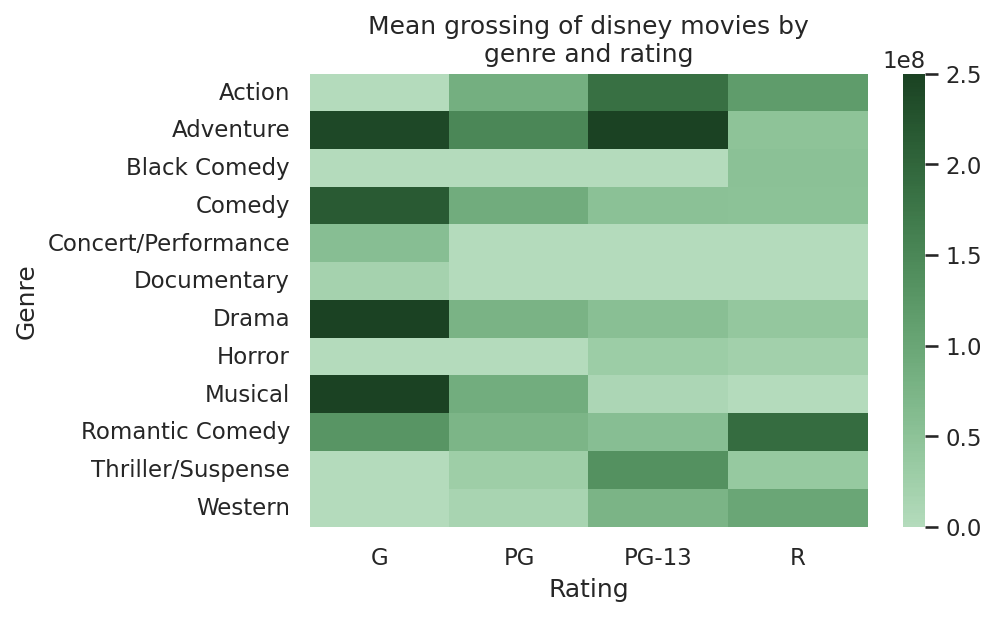

In [77]:
disney_movies = disney_movies.dropna()
disney_movies = disney_movies[disney_movies['mpaa_rating'] != 'Not Rated']
genre_rating_gross_pivot = pd.pivot_table(data=disney_movies, index=['genre'], columns=['mpaa_rating'], values='inflation_adjusted_gross', fill_value=0)

plt.figure(dpi=150)
plt.title("Mean grossing of disney movies by\ngenre and rating")
sb.heatmap(
    genre_rating_gross_pivot, 
    cmap=sb.cubehelix_palette(start=2, rot=0, dark=0.2, light=.8, as_cmap=True),
    vmin=0,
    vmax=2.5e8
)
plt.xlabel("Rating")
plt.ylabel("Genre")

# Barplot - Disney Movies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


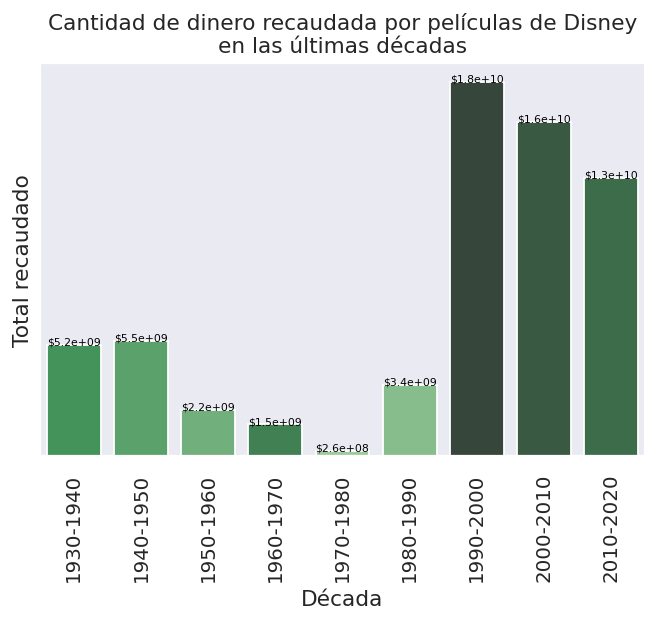

In [78]:
def categorize_release_dates_by_decades(release_date):
    if release_date < 1940:
        return "1930-1940"
    elif 1940 <= release_date < 1950:
        return  "1940-1950"
    elif 1950 <= release_date < 1960:
        return  "1950-1960"
    elif 1960 <= release_date < 1970:
        return  "1960-1970"
    elif 1970 <= release_date < 1980:
        return  "1970-1980"
    elif 1980 <= release_date < 1990:
        return  "1980-1990"
    elif 1990 <= release_date < 2000:
        return  "1990-2000"
    elif 2000 <= release_date < 2010:
        return  "2000-2010"
    elif release_date >= 2010:
        return "2010-2020"


df_bar = disney_movies[['release_date', 'inflation_adjusted_gross']]
df_bar['release_date'] = df_bar['release_date'].map(lambda date: categorize_release_dates_by_decades(pd.to_datetime(date).year))
df_bar = df_bar.groupby('release_date').sum().reset_index()

plt.figure(dpi=130)
plt.yticks([])
plt.xticks(rotation=90)
plt.title("Cantidad de dinero recaudada por películas de Disney\nen las últimas décadas")

ranks = df_bar.inflation_adjusted_gross.sort_values().index
palette = sb.color_palette('Greens_d', len(ranks))

ax = sb.barplot(
    data=df_bar, 
    x='release_date', 
    y='inflation_adjusted_gross',
    palette=np.array(palette)[ranks]
)
plt.ylabel("Total recaudado")
plt.xlabel("Década")
for index, row in df_bar.iterrows():
    ax.text(row.name, row.inflation_adjusted_gross, f'${"%.2g" % row.inflation_adjusted_gross}', color='black', ha="center", fontsize=6)


# Original

In [ ]:
import requests
import json

response = requests.get("https://whattomine.com/coins.json?eth=true&factor%5Beth_hr%5D=90.0&factor%5Beth_p%5D=420.0&e4g=true&factor%5Be4g_hr%5D=90.0&factor%5Be4g_p%5D=420.0&zh=true&factor%5Bzh_hr%5D=63.0&factor%5Bzh_p%5D=360.0&cnh=true&factor%5Bcnh_hr%5D=2880.0&factor%5Bcnh_p%5D=330.0&cng=true&factor%5Bcng_hr%5D=2280.0&factor%5Bcng_p%5D=360.0&cnf=true&factor%5Bcnf_hr%5D=4950.0&factor%5Bcnf_p%5D=330.0&cx=true&factor%5Bcx_hr%5D=3.3&factor%5Bcx_p%5D=360.0&eqa=true&factor%5Beqa_hr%5D=285.0&factor%5Beqa_p%5D=360.0&cc=true&factor%5Bcc_hr%5D=7.8&factor%5Bcc_p%5D=390.0&cr29=true&factor%5Bcr29_hr%5D=7.2&factor%5Bcr29_p%5D=390.0&ct31=true&factor%5Bct31_hr%5D=1.8&factor%5Bct31_p%5D=360.0&ct32=true&factor%5Bct32_hr%5D=0.48&factor%5Bct32_p%5D=360.0&eqb=true&factor%5Beqb_hr%5D=46.5&factor%5Beqb_p%5D=420.0&rmx=true&factor%5Brmx_hr%5D=1410.0&factor%5Brmx_p%5D=270.0&ns=true&factor%5Bns_hr%5D=2460.0&factor%5Bns_p%5D=450.0&al=true&factor%5Bal_hr%5D=177.0&factor%5Bal_p%5D=390.0&ops=true&factor%5Bops_hr%5D=14.7&factor%5Bops_p%5D=360.0&eqz=true&factor%5Beqz_hr%5D=42.0&factor%5Beqz_p%5D=390.0&zlh=true&factor%5Bzlh_hr%5D=42.0&factor%5Bzlh_p%5D=360.0&kpw=true&factor%5Bkpw_hr%5D=39.0&factor%5Bkpw_p%5D=510.0&ppw=true&factor%5Bppw_hr%5D=28.2&factor%5Bppw_p%5D=420.0&x25x=true&factor%5Bx25x_hr%5D=2.49&factor%5Bx25x_p%5D=240.0&fpw=true&factor%5Bfpw_hr%5D=43.5&factor%5Bfpw_p%5D=510.0&vh=true&factor%5Bvh_hr%5D=1.32&factor%5Bvh_p%5D=360.0&factor%5Bcost%5D=0.1&factor%5Bcost_currency%5D=USD&sort=Profitability24&volume=0&revenue=24h&factor%5Bexchanges%5D%5B%5D=&factor%5Bexchanges%5D%5B%5D=binance&factor%5Bexchanges%5D%5B%5D=bitfinex&factor%5Bexchanges%5D%5B%5D=bitforex&factor%5Bexchanges%5D%5B%5D=bittrex&factor%5Bexchanges%5D%5B%5D=coinex&factor%5Bexchanges%5D%5B%5D=dove&factor%5Bexchanges%5D%5B%5D=exmo&factor%5Bexchanges%5D%5B%5D=gate&factor%5Bexchanges%5D%5B%5D=graviex&factor%5Bexchanges%5D%5B%5D=hitbtc&factor%5Bexchanges%5D%5B%5D=hotbit&factor%5Bexchanges%5D%5B%5D=ogre&factor%5Bexchanges%5D%5B%5D=poloniex&factor%5Bexchanges%5D%5B%5D=stex&dataset=")

pd.DataFrame.from_dict(json.loads(response.content.decode())['coins']).transpose()

,id,tag,algorithm,block_time,block_reward,block_reward24,last_block,difficulty,difficulty24,nethash,...,exchange_rate_curr,market_cap,estimated_rewards,estimated_rewards24,btc_revenue,btc_revenue24,profitability,profitability24,lagging,timestamp
Ethereum,151,ETH,Ethash,13.5911,2.057091,3.526924,14693084,13786667282722560.0,13766116786140274.0,1014389363827987,...,BTC,"$340,175,819,405",0.00116,0.00199,0.00008484,0.00014567,100,100,False,1651423483
Nicehash-Ethash,15,NICEHASH,Ethash,1,1,1,0,1,1,58200115498683,...,BTC,$0,0.00008,0.0001,0.00008061,0.00010214,95,70,False,1651423506
Firo,175,FIRO,FiroPow,281.0,6.25,6.25,473045,7043.9635,6948.328452,107664031554,...,BTC,"$39,225,292",0.73732,0.74746,0.00005692,0.0000577,67,40,False,1651422494
Ravencoin,234,RVN,KawPow,60.0,2500.0,2500.0,2257437,44048.91911,44310.543836,3153144450039,...,BTC,"$460,575,925",44.52643,44.26353,0.00005076,0.00005046,60,35,False,1651423452
Sero,328,SERO,ProgPow,13.2617,4.4,4.4,7701537,444484965914.0,431435997937.72052,33516439514,...,BTC,"$38,844,915",17.11006,17.62711,0.00004888,0.00005036,58,35,False,1651423450
QuarkChain,318,QKC,Ethash,9.857,2.214784,2.214784,9660672,72202487577.0,67093947048.560394,14649992406,...,BTC,"$113,565,054",100.75452,108.3756,0.00004635,0.00004985,55,34,False,1651423447
Nicehash-KawPow,45,NICEHASH,KawPow,1,1,1,0,1,1,505080740424,...,BTC,$0,0.00005,0.00005,0.00004864,0.00004934,57,34,False,1651423506
Beam,294,BEAM,BeamHashIII,59.0,40.0,40.0,1742378,23443518.0,22361411.573798,397347,...,BTC,"$29,175,092",6.51143,6.8265,0.00004356,0.00004567,51,31,False,1651423457
Ergo,340,ERG,Autolykos,119.0,63.0222,63.150541,740276,1850950515949568.0,1850950515949568.0,15554206016382,...,BTC,"$106,633,397",0.5207,0.52176,0.00004496,0.00004505,53,31,False,1651423447
Nicehash-BeamV3,38,NICEHASH,BeamHashIII,1,1,1,0,1,1,213595,...,BTC,$0,0.00004,0.00004,0.00004211,0.00004499,50,31,False,1651423505


In [25]:
import plotly.express as px
import requests
import json
import pandas as pd

response = requests.get("https://whattomine.com/coins.json?eth=true&factor%5Beth_hr%5D=90.0&factor%5Beth_p%5D=420.0&e4g=true&factor%5Be4g_hr%5D=90.0&factor%5Be4g_p%5D=420.0&zh=true&factor%5Bzh_hr%5D=63.0&factor%5Bzh_p%5D=360.0&cnh=true&factor%5Bcnh_hr%5D=2880.0&factor%5Bcnh_p%5D=330.0&cng=true&factor%5Bcng_hr%5D=2280.0&factor%5Bcng_p%5D=360.0&cnf=true&factor%5Bcnf_hr%5D=4950.0&factor%5Bcnf_p%5D=330.0&cx=true&factor%5Bcx_hr%5D=3.3&factor%5Bcx_p%5D=360.0&eqa=true&factor%5Beqa_hr%5D=285.0&factor%5Beqa_p%5D=360.0&cc=true&factor%5Bcc_hr%5D=7.8&factor%5Bcc_p%5D=390.0&cr29=true&factor%5Bcr29_hr%5D=7.2&factor%5Bcr29_p%5D=390.0&ct31=true&factor%5Bct31_hr%5D=1.8&factor%5Bct31_p%5D=360.0&ct32=true&factor%5Bct32_hr%5D=0.48&factor%5Bct32_p%5D=360.0&eqb=true&factor%5Beqb_hr%5D=46.5&factor%5Beqb_p%5D=420.0&rmx=true&factor%5Brmx_hr%5D=1410.0&factor%5Brmx_p%5D=270.0&ns=true&factor%5Bns_hr%5D=2460.0&factor%5Bns_p%5D=450.0&al=true&factor%5Bal_hr%5D=177.0&factor%5Bal_p%5D=390.0&ops=true&factor%5Bops_hr%5D=14.7&factor%5Bops_p%5D=360.0&eqz=true&factor%5Beqz_hr%5D=42.0&factor%5Beqz_p%5D=390.0&zlh=true&factor%5Bzlh_hr%5D=42.0&factor%5Bzlh_p%5D=360.0&kpw=true&factor%5Bkpw_hr%5D=39.0&factor%5Bkpw_p%5D=510.0&ppw=true&factor%5Bppw_hr%5D=28.2&factor%5Bppw_p%5D=420.0&x25x=true&factor%5Bx25x_hr%5D=2.49&factor%5Bx25x_p%5D=240.0&fpw=true&factor%5Bfpw_hr%5D=43.5&factor%5Bfpw_p%5D=510.0&vh=true&factor%5Bvh_hr%5D=1.32&factor%5Bvh_p%5D=360.0&factor%5Bcost%5D=0.1&factor%5Bcost_currency%5D=USD&sort=Profitability24&volume=0&revenue=24h&factor%5Bexchanges%5D%5B%5D=&factor%5Bexchanges%5D%5B%5D=binance&factor%5Bexchanges%5D%5B%5D=bitfinex&factor%5Bexchanges%5D%5B%5D=bitforex&factor%5Bexchanges%5D%5B%5D=bittrex&factor%5Bexchanges%5D%5B%5D=coinex&factor%5Bexchanges%5D%5B%5D=dove&factor%5Bexchanges%5D%5B%5D=exmo&factor%5Bexchanges%5D%5B%5D=gate&factor%5Bexchanges%5D%5B%5D=graviex&factor%5Bexchanges%5D%5B%5D=hitbtc&factor%5Bexchanges%5D%5B%5D=hotbit&factor%5Bexchanges%5D%5B%5D=ogre&factor%5Bexchanges%5D%5B%5D=poloniex&factor%5Bexchanges%5D%5B%5D=stex&dataset=")

In [26]:
coins_to_mine = pd.DataFrame.from_dict(json.loads(response.content.decode())['coins']).transpose()

top_10_coins_to_mine = coins_to_mine.sort_values(by=['btc_revenue', 'profitability'], ascending=False).head(10)

top_10_coins_to_mine = top_10_coins_to_mine.reset_index().rename(columns={'index': 'coin'})
top_10_coins_to_mine['btc_revenue'] = top_10_coins_to_mine['btc_revenue'].apply(lambda r: float(r))
top_10_coins_to_mine

,coin,id,tag,algorithm,block_time,block_reward,block_reward24,last_block,difficulty,difficulty24,...,exchange_rate_curr,market_cap,estimated_rewards,estimated_rewards24,btc_revenue,btc_revenue24,profitability,profitability24,lagging,timestamp
0,Ethereum,151,ETH,Ethash,13.5039,2.041913,2.116899,14696043,14006163136019936.0,13926250702144494.0,...,BTC,"$342,737,574,013",0.00113,0.00118,0.000083,0.0000869,100,100,False,1651463403
1,Nicehash-Ethash,15,NICEHASH,Ethash,1,1,1,0,1,1,...,BTC,$0,0.00008,0.00009,0.000078,0.00008782,93,101,False,1651463404
2,Firo,175,FIRO,FiroPow,293.0,6.25,6.25,473171,6983.1713,7000.81433,...,BTC,"$39,257,910",0.74372,0.74185,0.000057,0.0000572,69,66,False,1651463410
3,Sero,328,SERO,ProgPow,12.7524,4.4,4.4,7704533,429764809529.0,437615410424.795776,...,BTC,"$40,294,878",17.69619,17.37899,0.000052,0.00005139,63,59,False,1651463409
4,Nicehash-KawPow,45,NICEHASH,KawPow,1,1,1,0,1,1,...,BTC,$0,0.00005,0.00005,0.000052,0.00004966,62,57,False,1651463404
5,Ravencoin,234,RVN,KawPow,60.0,2500.0,2500.0,2258084,42631.413569,42744.184202,...,BTC,"$453,403,788",46.00693,45.88555,0.000052,0.00005139,62,59,False,1651463412
6,Conceal,305,CCX,CryptoNightGPU,121.0,6.001,5.999377,1018746,215000000.0,268175555.555556,...,BTC,"$4,058,756",5.49132,4.4024,0.000048,0.0000387,58,45,False,1651463298
7,Zclassic,167,ZCL,EquihashZero,77.0,0.78125,0.78125,1565675,16.226607,20.375648,...,BTC,"$804,097",20.82073,16.66164,0.000047,0.00003732,56,43,False,1651463056
8,Nicehash-BeamV3,38,NICEHASH,BeamHashIII,1,1,1,0,1,1,...,BTC,$0,0.00005,0.00004,0.000046,0.00004488,55,52,False,1651463403
9,Ergo,340,ERG,Autolykos,116.0,63.0254,63.25965,740629,1874246418563072.0,1859883149631434.5,...,BTC,"$108,714,205",0.51425,0.52015,0.000045,0.0000457,54,53,False,1651463284


In [70]:
fig = px.bar(
    data_frame=top_10_coins_to_mine, 
    x='coin', 
    y='btc_revenue',
    color=['#3c3c3d', '#f0ad3a', '#a81c14', '#595555', '#f0ad3b', '#384182', '#fcf8f7', '#c87035', '#f0ad3c', '#1c1919'],
    color_discrete_map="identity",
    title="Top 10 criptomonedas con mayor rentabilidad para minar en 2022",
    labels={
        "btc_revenue": "Ganancia en BTC",
        "coin": "Criptomoneda"
    },
    template="plotly_dark",
    
)
fig.update_layout(yaxis_tickformat = 'm')
fig.show()

In [15]:
px.colors.qualitative.G10

['#3366CC',
 '#DC3912',
 '#FF9900',
 '#109618',
 '#990099',
 '#0099C6',
 '#DD4477',
 '#66AA00',
 '#B82E2E',
 '#316395']